In [3]:
from PIL import Image
import math
import numpy as np

In [4]:
path = "C:/Users/maksy/Downloads/cv labs"

In [5]:
im = Image.open(f'{path}/22.jpg') # 22 55

im = im.convert(mode='L')
pix = im.load()

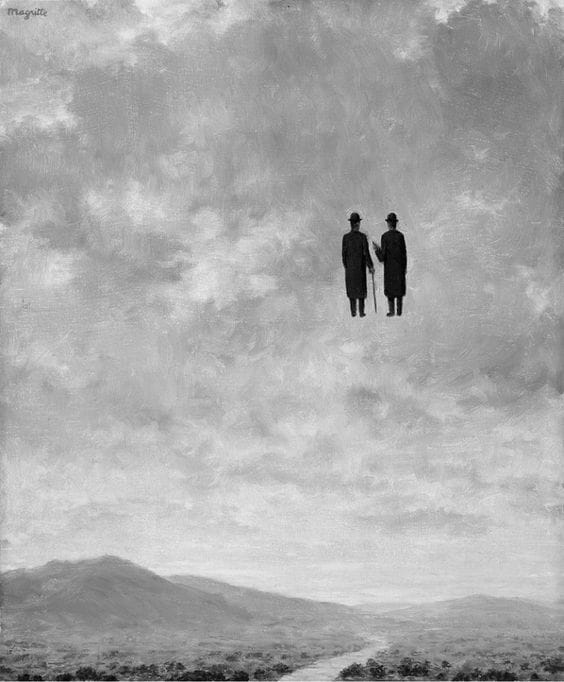

In [6]:
im

In [7]:
cropped_img = im.crop((300, 150, 500, 500))
cropped_img.size

(200, 350)

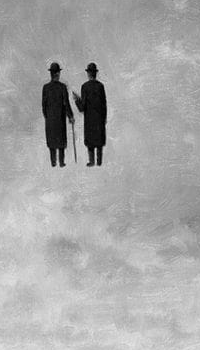

In [8]:
cropped_img

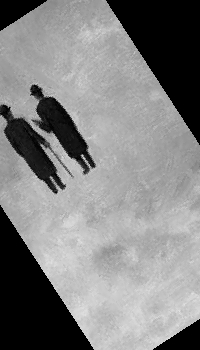

In [9]:
rotated_img = cropped_img.rotate(33)
rotated_img


In [385]:
!pip install opencv-python

In [15]:
import cv2

In [16]:
fast = cv2.FastFeatureDetector_create(threshold=333)

In [17]:
im_querry = np.array(im, dtype=np.uint8)
rotated_im_querry = np.array(rotated_img, dtype=np.uint8)

In [18]:
kp1 = fast.detect(im_querry,None)
kp2 = fast.detect(rotated_im_querry,None)

An interest point in an image is a pixel which has a well-defined
position and can be robustly detected.

Interest points have high local information content and
they should be ideally repeatable between different images

The reason behind the work of the FAST algorithm was to develop an interest point detector
for use in real time frame rate applications, which have limited
computational resources

There are a few limitations to the algorithm. First, for N<12, the algorithm does not work very well in
all cases because when N<12 the number of interest points detected are very high. Second, the order
in which the 16 pixels are queried determines the speed of the algorithm

In [19]:
img2 = cv2.drawKeypoints(im_querry, kp1, im_querry, color=(255,0,0))

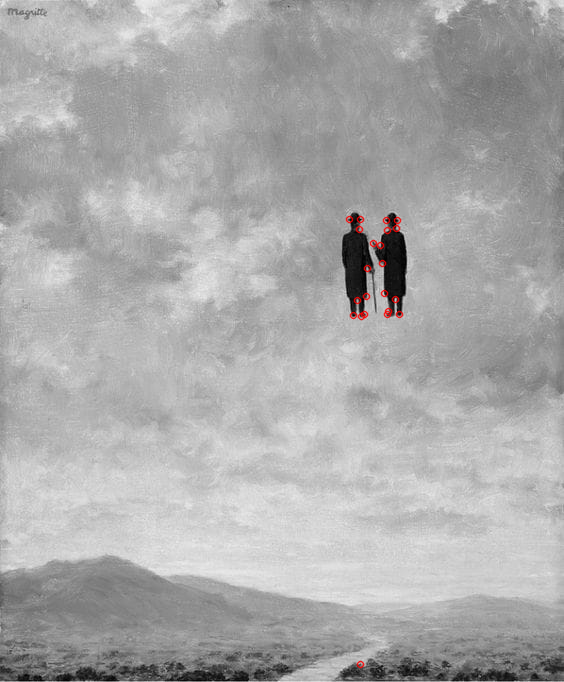

In [20]:
Image.fromarray(img2)

In [28]:
descriptor = cv2.SIFT_create()
# descriptor = cv.ORB_create()
kps1, desc1 = descriptor.compute(im_querry, kp1)
kps2, desc2 = descriptor.compute(rotated_im_querry, kp2)

In [45]:
def match(desc1, desc2):
    matches = []
    i = 0
    for d1 in desc1:
        j = 0
        for d2 in desc2:
            distance = np.linalg.norm(d1 - d2, ord=2)
            matches.append(cv2.DMatch(_trainIdx=j, _queryIdx=i, _distance=distance, _imgIdx=0))
            j+=1
        i+=1
    matches = sorted(matches, key=lambda sample: sample.distance)
    return matches


In [46]:
res = match(desc1, desc2)

In [42]:
from matplotlib import pyplot as plt

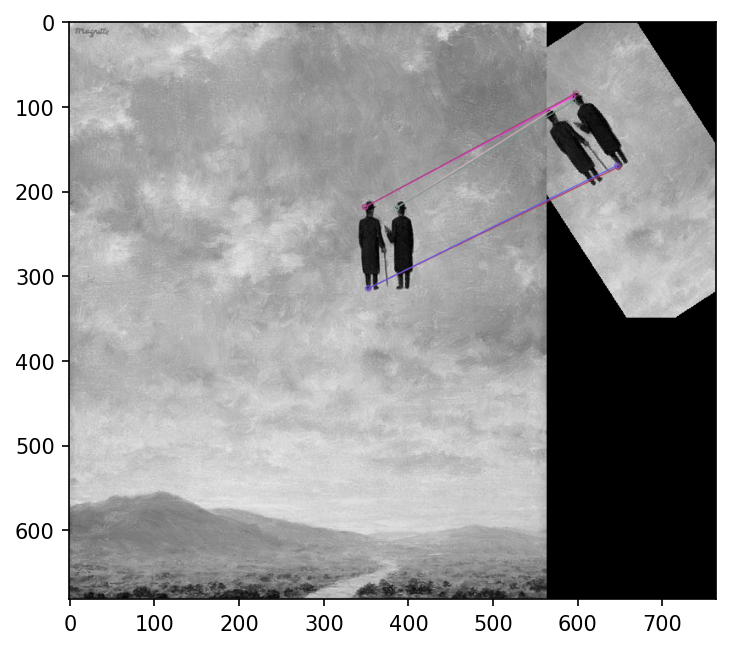

In [47]:
image = cv2.drawMatches(im_querry, kps1, rotated_im_querry, kps2, res[:6], None, flags=2)

plt.figure(figsize=(15, 5), dpi=150)
plt.imshow(image)